In [98]:
import numpy as np
import pandas as pd
import struct
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
# Got this helper function from the internet

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [144]:
X = read_idx("train-images-idx3-ubyte")
y = read_idx("train-labels-idx1-ubyte")

/Users/bassim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# Reshaping as .fit only takes into 2D arrays

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [9]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)

In [10]:
print("Using Naive Bayes, number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
print (" ")
print ("Accuracy percentage of {}".format(1-((y_test != y_pred).sum())/X_test.shape[0]))

Using Naive Bayes, number of mislabeled points out of a total 15000 points : 6538
 
Accuracy percentage of 0.5641333333333334


In [11]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
y_pred = clf.fit(X_train,y_train).predict(X_test)

In [12]:
print("Using Bernoulli Naive Bayes, number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
print (" ")
print ("Accuracy percentage of {}".format(1-((y_test != y_pred).sum())/X_test.shape[0]))

Using Bernoulli Naive Bayes, number of mislabeled points out of a total 15000 points : 2602
 
Accuracy percentage of 0.8265333333333333


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [14]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_val.shape
X_val = X_val.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [22]:
clf = LinearSVC()

In [23]:
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [26]:
y_pred = clf.predict(X_val)
print("Using linear SVC, number of mislabeled points out of a total %d points : %d" % (X_val.shape[0],(y_val != y_pred).sum()))
print (" ")
print ("Accuracy percentage of {}".format(1-((y_val != y_pred).sum())/X_val.shape[0]))

Using linear SVC, number of mislabeled points out of a total 6000 points : 806
 
Accuracy percentage of 0.8656666666666667


In [16]:
# Exploring different values of C

acc_percentage = []
for x in tqdm(range(1,4)):
    clf = LinearSVC(C=float(x))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = 1-((y_val != y_pred).sum())/X_val.shape[0]
    acc_percentage.append(accuracy)

100%|██████████| 3/3 [05:45<00:00, 115.25s/it]


In [18]:
acc_percentage

[0.831, 0.8648333333333333, 0.8553333333333333]

Text(0,0.5,'accuracy')

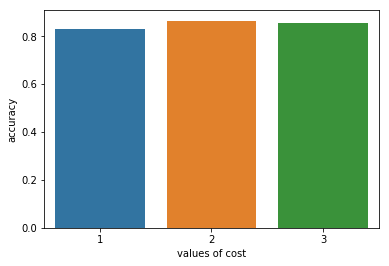

In [27]:
sns.barplot(x=[1,2,3],y=acc_percentage)
plt.xlabel('values of cost')
plt.ylabel('accuracy')

In [28]:
# Exploring different values of max iterations

acc_percentage = []
for x in tqdm([500,1000,1500]):
    clf = LinearSVC(max_iter=x)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = 1-((y_val != y_pred).sum())/X_val.shape[0]
    acc_percentage.append(accuracy)


100%|██████████| 3/3 [05:45<00:00, 115.12s/it]


In [30]:
acc_percentage

[0.8426666666666667, 0.8581666666666666, 0.8765000000000001]

Text(0,0.5,'accuracy')

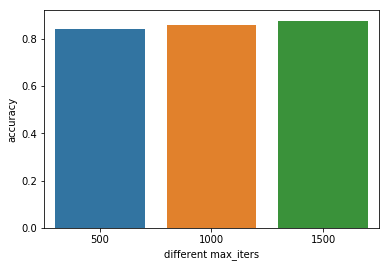

In [29]:
sns.barplot(x=[500,1000,1500],y=acc_percentage)
plt.xlabel('different max_iters')
plt.ylabel('accuracy')

In [31]:
print (
'''
Best parameters found C=2.0, max_iters=1500. Increasing max_iters improves accuracy, reduces speed.
'''
)


Best parameters found C=2.0, max_iters=1500. Increasing max_iters improves accuracy, reduces speed.



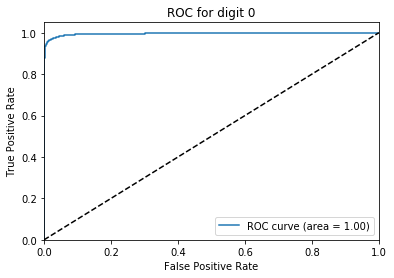

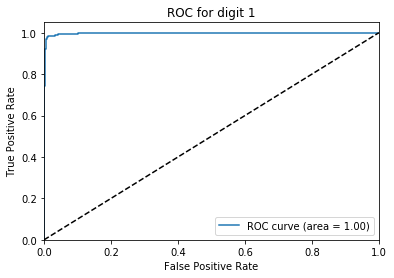

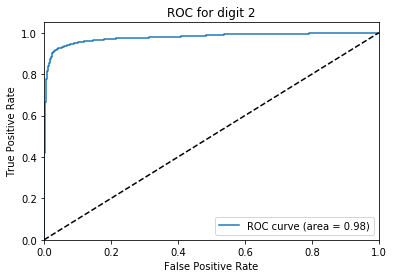

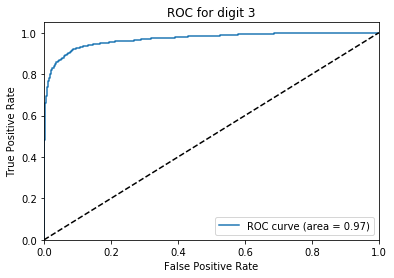

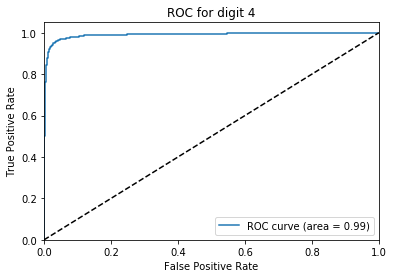

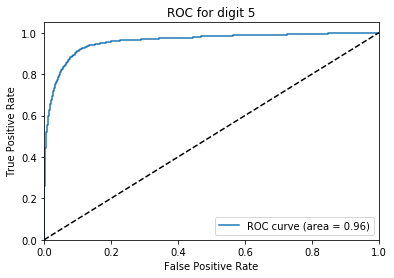

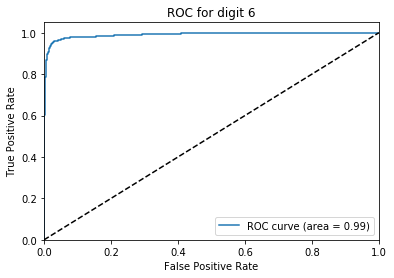

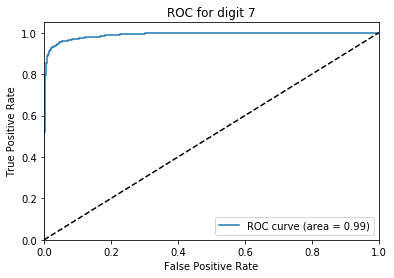

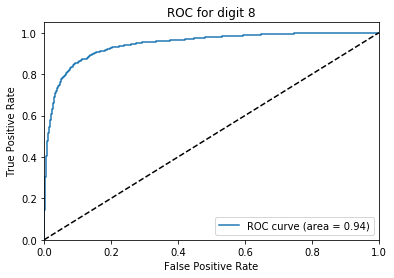

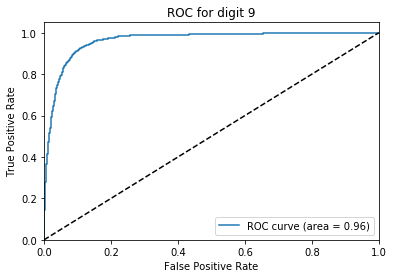

In [92]:
# LINEAR SVC ROC

# Got the plotting code from the documentation

y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

# Using optimal params found for Linear SVC
clf = OneVsRestClassifier(LinearSVC(C=2.0,max_iter=1500))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
count = 0
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for digit {}'.format(count))
    plt.legend(loc="lower right")
    plt.show()
    count += 1

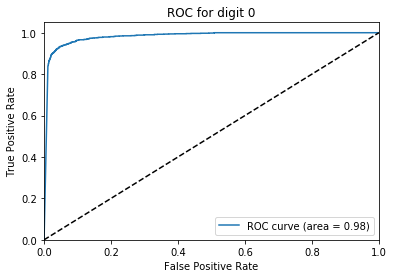

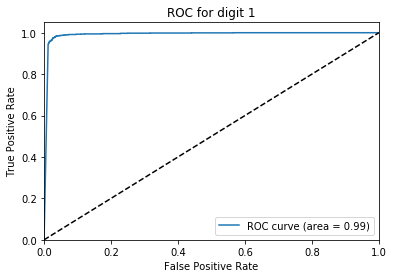

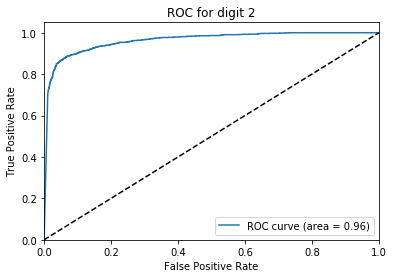

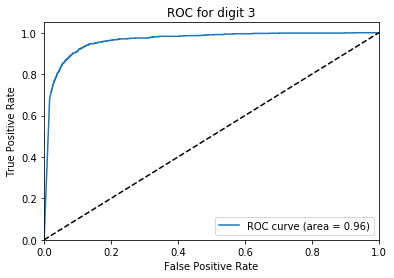

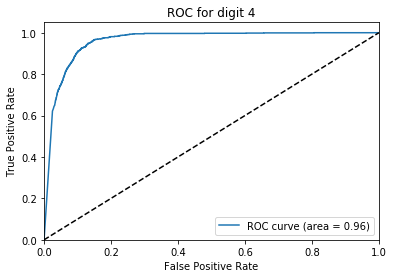

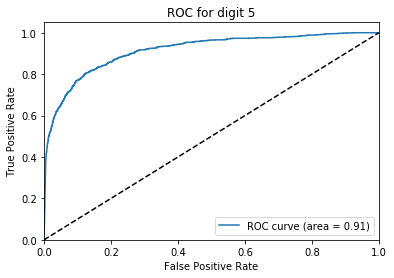

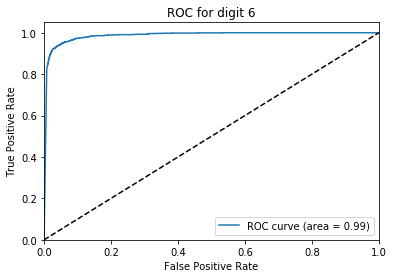

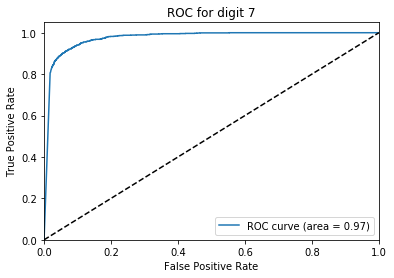

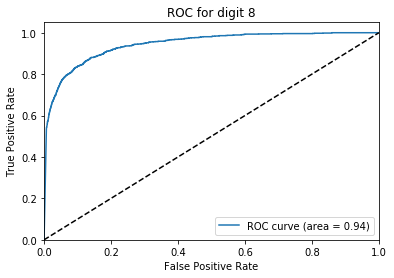

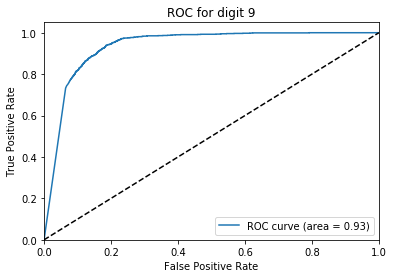

In [106]:
# ROC Naive Bayes

y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

clf = OneVsRestClassifier(BernoulliNB())
y_score_ = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
count = 0
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for digit {}'.format(count))
    plt.legend(loc="lower right")
    plt.show()
    count += 1

In [97]:
print (
'''
Overall, I'd prefer the Linear SVC as it does better on most digits than Naive Bayes. But if I needed a faster model I would pick Naive Bayes.
'''
)


Overall, I'd prefer the Linear SVC as it does better on most digits than Naive Bayes. But if I needed a faster model I would pick Naive Bayes.



In [126]:
# APPLYING LINEAR DISCRIMINANT ANALYSIS, k=9

X = read_idx("train-images-idx3-ubyte")
y = read_idx("train-labels-idx1-ubyte")
nsamples, nx, ny = X.shape
X_ = X.reshape((nsamples,nx*ny))
lin = LinearDiscriminantAnalysis()
new_data = lin.fit_transform(X_,y)

/Users/bassim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys
/Users/bassim/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/bassim/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


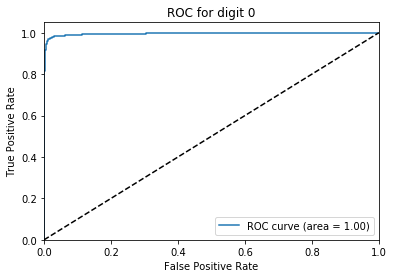

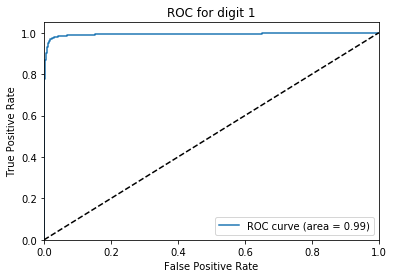

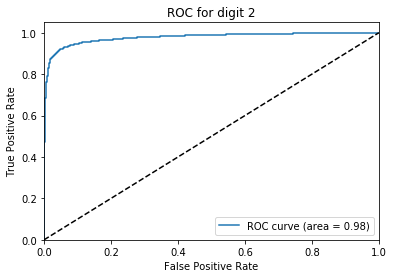

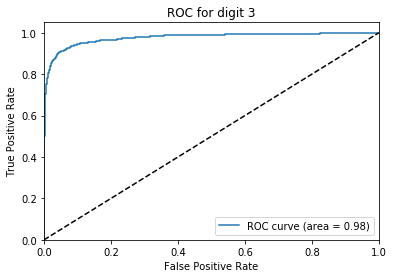

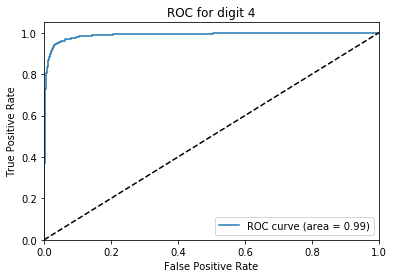

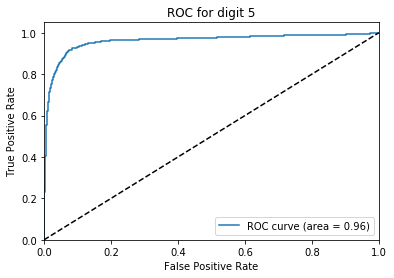

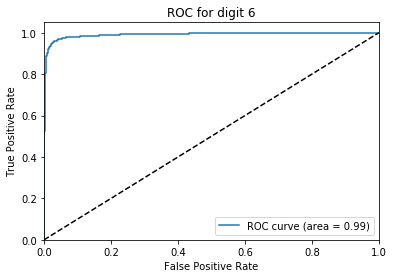

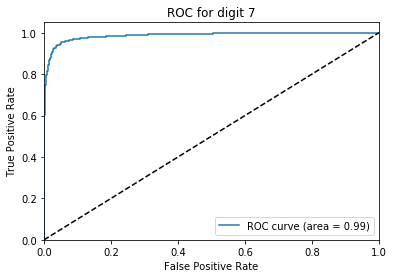

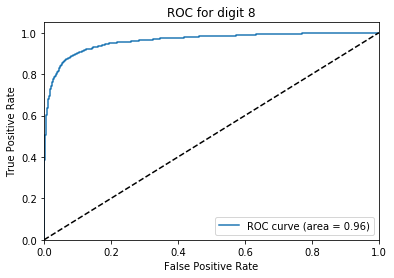

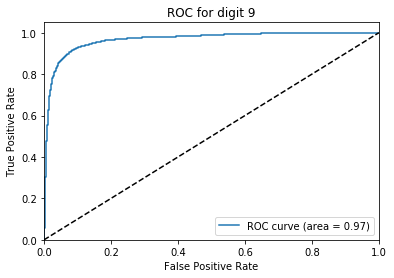

In [132]:
# LINEAR SVC ROC AFTER GENERALIZED DISCRIMINANT ANALYSIS WITH K=9 (default setting)
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
n_classes = 10
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=0)
# Using optimal params found for Linear SVC
clf = OneVsRestClassifier(LinearSVC(C=2.0,max_iter=1500))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
count = 0
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for digit {}'.format(count))
    plt.legend(loc="lower right")
    plt.show()
    count += 1

In [134]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Using linear SVC after discriminant analysis (k=9), number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
print (" ")
print ("Accuracy percentage of {}".format(1-((y_test != y_pred).sum())/X_test.shape[0]))

Using linear SVC after discriminant analysis (k=9), number of mislabeled points out of a total 12000 points : 3521
 
Accuracy percentage of 0.7065833333333333


In [155]:
# APPLYING LINEAR DISCRIMINANT ANALYSIS for various levels of k
import warnings
warnings.filterwarnings("ignore")
X = read_idx("train-images-idx3-ubyte")
y = read_idx("train-labels-idx1-ubyte")
nsamples, nx, ny = X.shape
X_ = X.reshape((nsamples,nx*ny))
list_acc = []
for x in tqdm([9,8,7,6,5,4,3,2,1]):
    lin = LinearDiscriminantAnalysis(n_components=x)
    new_data = lin.fit_transform(X_,y)
    X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=0)
    clf = LinearSVC(C=2.0,max_iter=1500)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    accuracy = 1-((y_test != y_pred).sum())/X_test.shape[0]
    list_acc.append(accuracy)


100%|██████████| 9/9 [07:56<00:00, 52.99s/it]


Text(0,0.5,'accuracy')

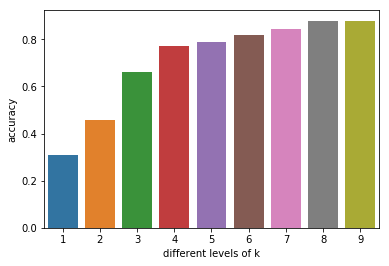

In [157]:
sns.barplot(x=[9,8,7,6,5,4,3,2,1],y=list_acc)
plt.xlabel('different levels of k')
plt.ylabel('accuracy')

In [160]:
print (
'''
lowest value of k that you observe such that there is no significant (>1%) increase in error is 8. At this level the
most misclassified digit is 8.

Perhaps an 8 in lower dimensions start looking like other digits such as 0.

'''
)


lowest value of k that you observe such that there is no significant (>1%) increase in error is 8. At this level the
most misclassified digit is 8.

Perhaps an 8 in lower dimensions start looking like other digits such as 0.


